In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

In [4]:
# DECISION TREE CLASSIFIER

tree_model = DecisionTreeClassifier(random_state=25)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Rapport
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

# Score
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = report_tree["macro avg"]["f1-score"]

# Enregistrement du modèle et des prédictions
joblib.dump(tree_model, "Models/decision_tree.pkl")
np.save("Predictions/y_pred_tree.npy", y_pred_tree)

Classification Report (Decision Tree):
              precision    recall  f1-score   support

          10       0.35      0.51      0.42       623
          40       0.60      0.60      0.60       496
          50       0.65      0.57      0.61       329
          60       0.89      0.77      0.83       163
        1140       0.70      0.69      0.69       533
        1160       0.87      0.87      0.87       790
        1180       0.59      0.47      0.52       153
        1280       0.59      0.55      0.57       969
        1281       0.41      0.46      0.44       408
        1300       0.90      0.89      0.89      1001
        1301       0.85      0.80      0.83       139
        1302       0.63      0.64      0.64       475
        1320       0.64      0.63      0.63       645
        1560       0.68      0.65      0.66      1000
        1920       0.85      0.84      0.84       816
        1940       0.66      0.74      0.70       160
        2060       0.64      0.68      0.6

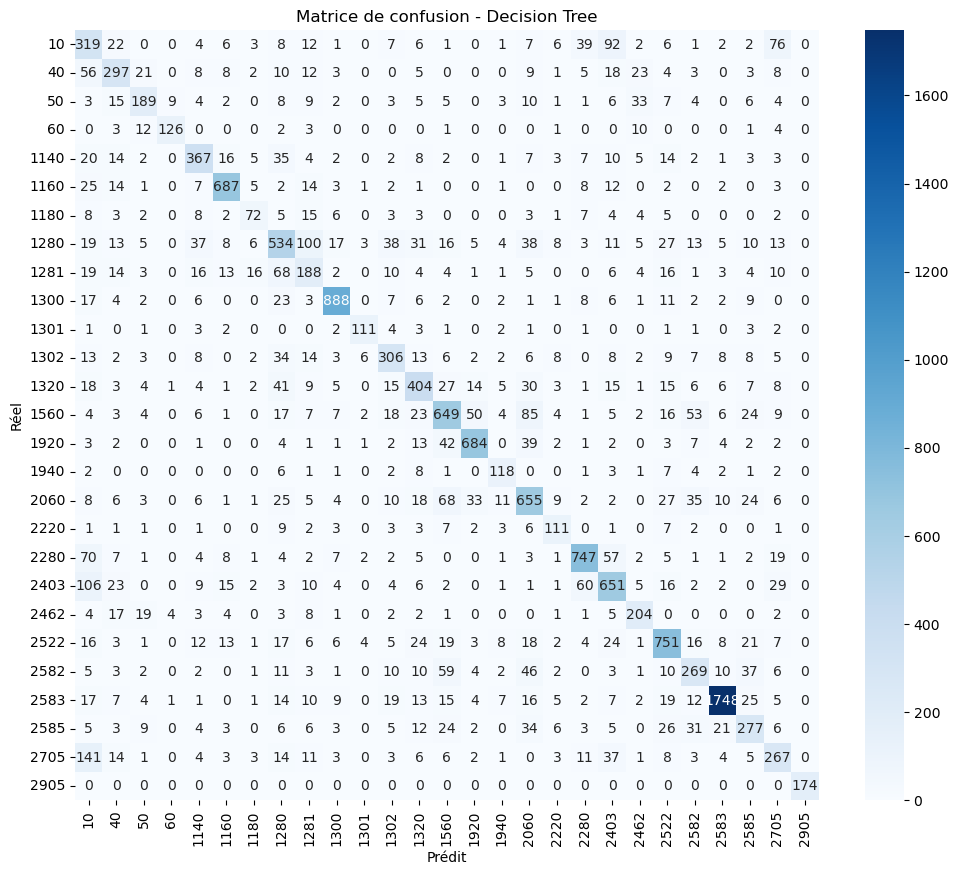

In [5]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Decision Tree")
plt.show()

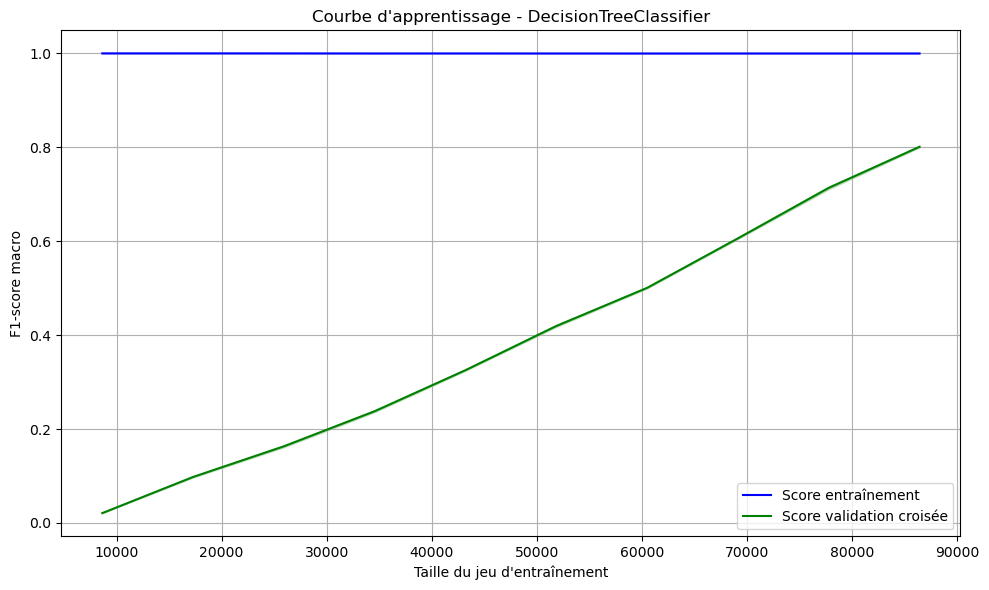

In [6]:
# Courbe d'apprentissage du Decision Tree

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - DecisionTreeClassifier")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le Score d'entraînement est toujours égal à 1. L'arbre de décision s'adapte exactement aux exemple d'entrainement jusqu'à mémoriser les données. Il y a un problème persistant de surapprentissage.
- Le Score de validation est très faible avec peu de données (très mauvaise généralisation du modèle), et croit avec l'augmentation de la taille des données (meilleure généralisation).
- Pour réduire le surapprentissage, nous pouvons retester un modèle de DecisionTree en jouant sur le paramètre max_depth.


In [3]:
# Courbe d'apprentissage du Decision Tree

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(max_depth=200, min_samples_leaf=10, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - DecisionTreeClassifier - Max depth = 200")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

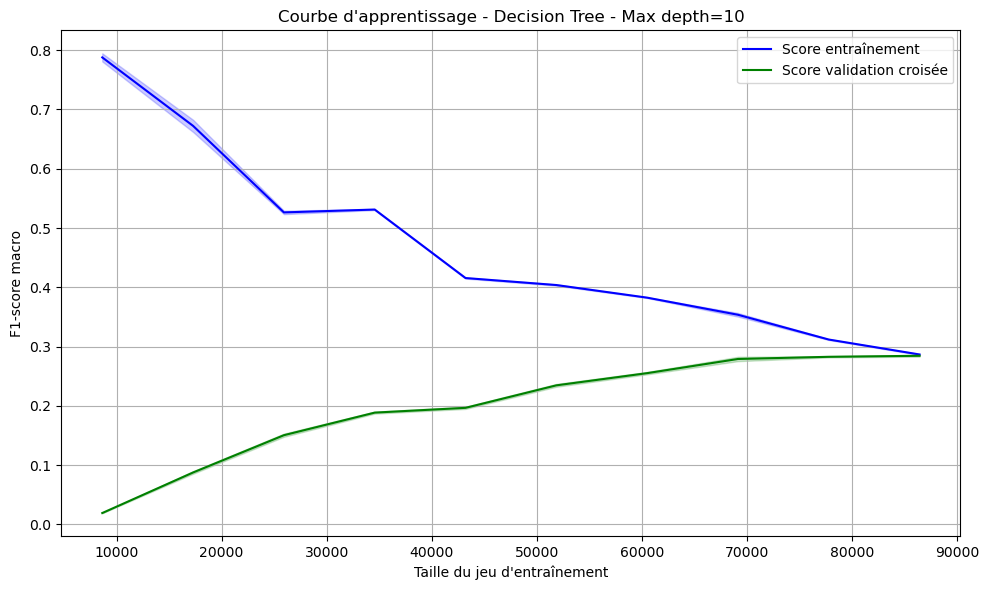

In [12]:
# Courbe d'apprentissage du Decision Tree avec "max_depth=10" et "min_samples_leaf=10"

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Decision Tree - Max depth=10")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score entraînement diminue progressivement (~0.8 ➝ ~0.3).
- Le modèle devient moins performant même sur ses propres données à mesure que la quantité de données augmente, probablement parce qu’il est trop contraint (sous-ajusté)

- Le score validation croisée monte un peu, mais reste très bas (~0.05 ➝ ~0.28)
- Le modèle ne parvient pas à capturer suffisamment de complexité pour bien généraliser, même avec beaucoup de données.

Conlusion : Underfitting, le modèle est trop simple pour apprendre, même avec plus de données. Les deux courbes finissent par se rapprocher à un faible niveau de performance

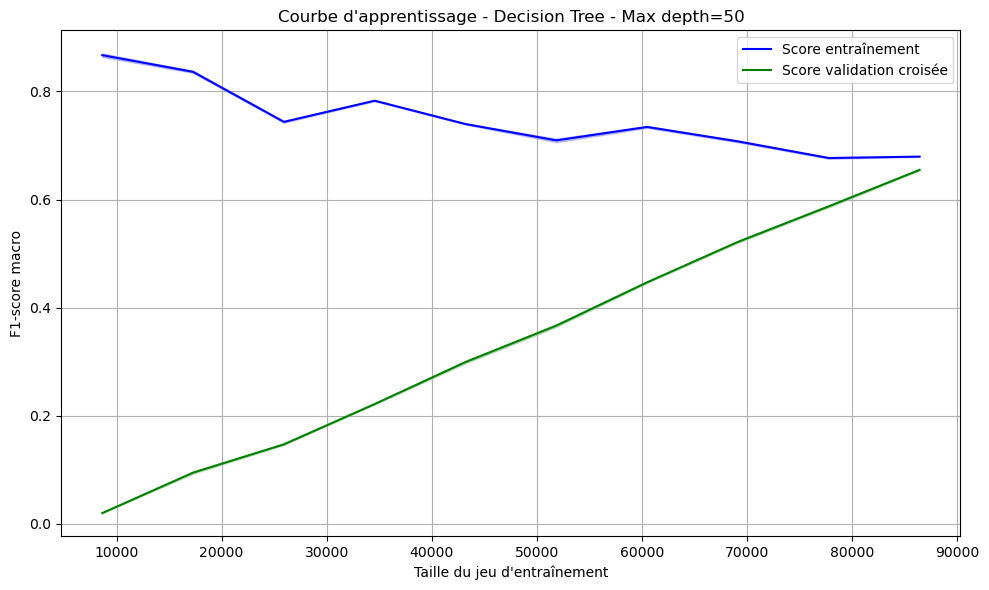

In [13]:
# Courbe d'apprentissage du Decision Tree avec "max_depth=50" et "min_samples_leaf=15"

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(max_depth=50, min_samples_leaf=15, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Decision Tree - Max depth=50")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Le score entraînement reste élevé (~0.85 ➝ ~0.7)
- Le modèle mémorise bien les données d'entraînement, même avec de grands volumes.

- Score validation croisée grimpe progressivement (~0.02 ➝ ~0.65)
- À mesure que l'on ajoute plus de données, le modèle généralise de mieux en mieux

Conclusion : la courbe de validation croisée monte et rejoint quasiment la courbe d'entraînement
Il semble que cela soit un bon compromis.

In [10]:
# DECISION TREE CLASSIFIER
# On refait le modèle est les prédiction avec le paramètre max_depth=50

tree_model = DecisionTreeClassifier(max_depth=50, random_state=25)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Rapport
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

# Score
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = report_tree["macro avg"]["f1-score"]

# Enregistrement du modèle et des prédictions
joblib.dump(tree_model, "Models/decision_tree.pkl")
np.save("Predictions/y_pred_tree.npy", y_pred_tree)

Classification Report (Decision Tree):
              precision    recall  f1-score   support

          10       0.11      0.89      0.20       623
          40       0.82      0.33      0.47       496
          50       0.75      0.40      0.53       329
          60       0.94      0.72      0.82       163
        1140       0.80      0.46      0.58       533
        1160       0.92      0.62      0.74       790
        1180       0.74      0.38      0.50       153
        1280       0.66      0.40      0.50       969
        1281       0.40      0.41      0.41       408
        1300       0.96      0.80      0.87      1001
        1301       0.91      0.76      0.83       139
        1302       0.81      0.53      0.65       475
        1320       0.78      0.44      0.56       645
        1560       0.39      0.57      0.46      1000
        1920       0.88      0.74      0.81       816
        1940       0.75      0.61      0.67       160
        2060       0.76      0.51      0.6

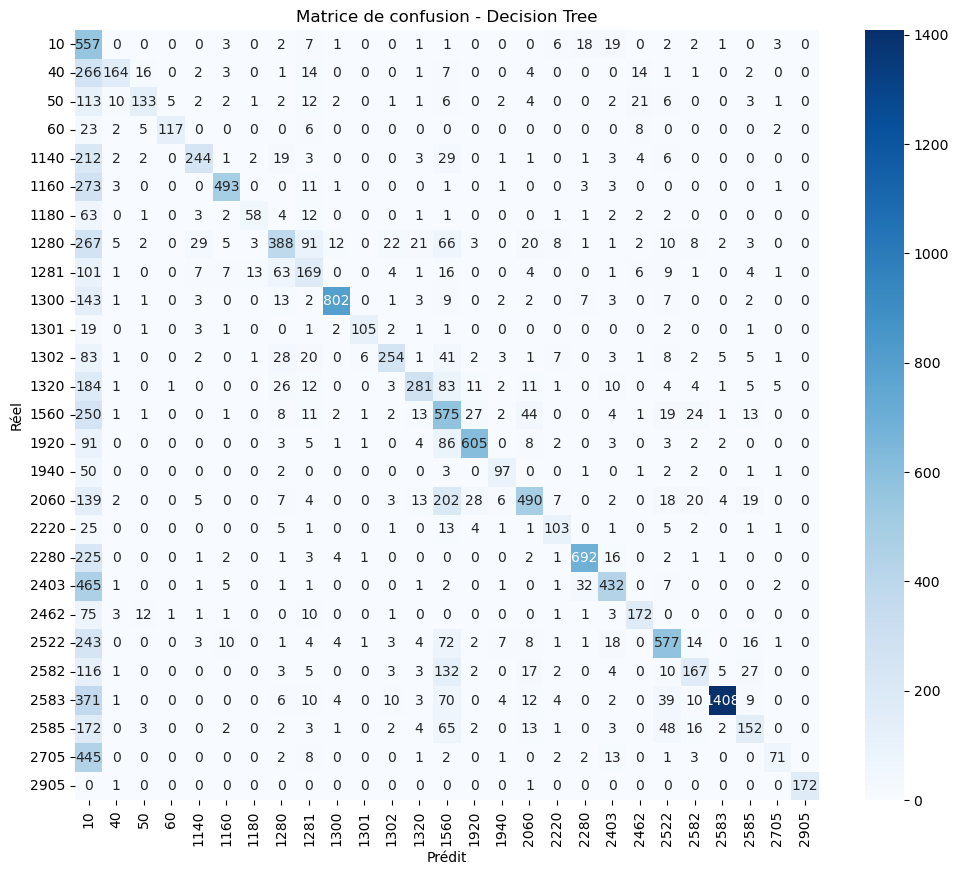

In [11]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Decision Tree")
plt.show()